In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
import pickle #me permite guardar objetos de python
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
#import lightgbm as lgb
#from catboost import CatBoostClassifier librerias que toman datos numericos y categoricos. 

### Prediciendo la diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

- Pregnancies: Número de embarazos del paciente (numérico)
- Glucose: Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure: Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness: Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin: Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI: Índice de masa corporal (numérico)
- DiabetesPedigreeFunction: Función de pedigrí de diabetes (numérico)
- Age: Edad del paciente (numérico)
- Outcome: Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico) #TARGET

In [41]:
df = pd.read_csv('/workspaces/Antonio27M-machine-learning/data/raw/internal-link diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
df['SkinThickness'].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40     16
22     16
37     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
16      6
11      6
45      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
8       2
52      2
7       2
60      1
51      1
56      1
63      1
99      1
Name: count, dtype: int64

In [43]:
media_sk = df['SkinThickness'].mean()
media_sk

20.536458333333332

In [44]:
df['SkinThickness'].replace(0, media_sk, inplace=True)

/tmp/ipykernel_3905/1760259983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].replace(0, media_sk, inplace=True)


In [45]:
df['Insulin'].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
127      1
510      1
402      1
258      1
375      1
Name: count, Length: 186, dtype: int64

In [46]:
df['Insulin'].replace(0, 0.2, inplace=True)

/tmp/ipykernel_3905/2464036149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insulin'].replace(0, 0.2, inplace=True)


### Observaciones:

No elimine los valores 0 en 'Insulin' y 'SkinThickness' porque entre los dos representan casi el 30% de la data, convertí los esos valores en caso de la insulina el valor mínimo que existe y el del grosor de la piel en la media de adultos entre valores normales. 
No los elimine directamente, ya que representan casi el 30% de mi df y puedo alterar mis datos.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.000000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.000000,72.0000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.0000,32.00000,99.00
Insulin,768.0,79.896875,115.176497,0.200,0.200000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.300000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.0000,1.00000,1.00


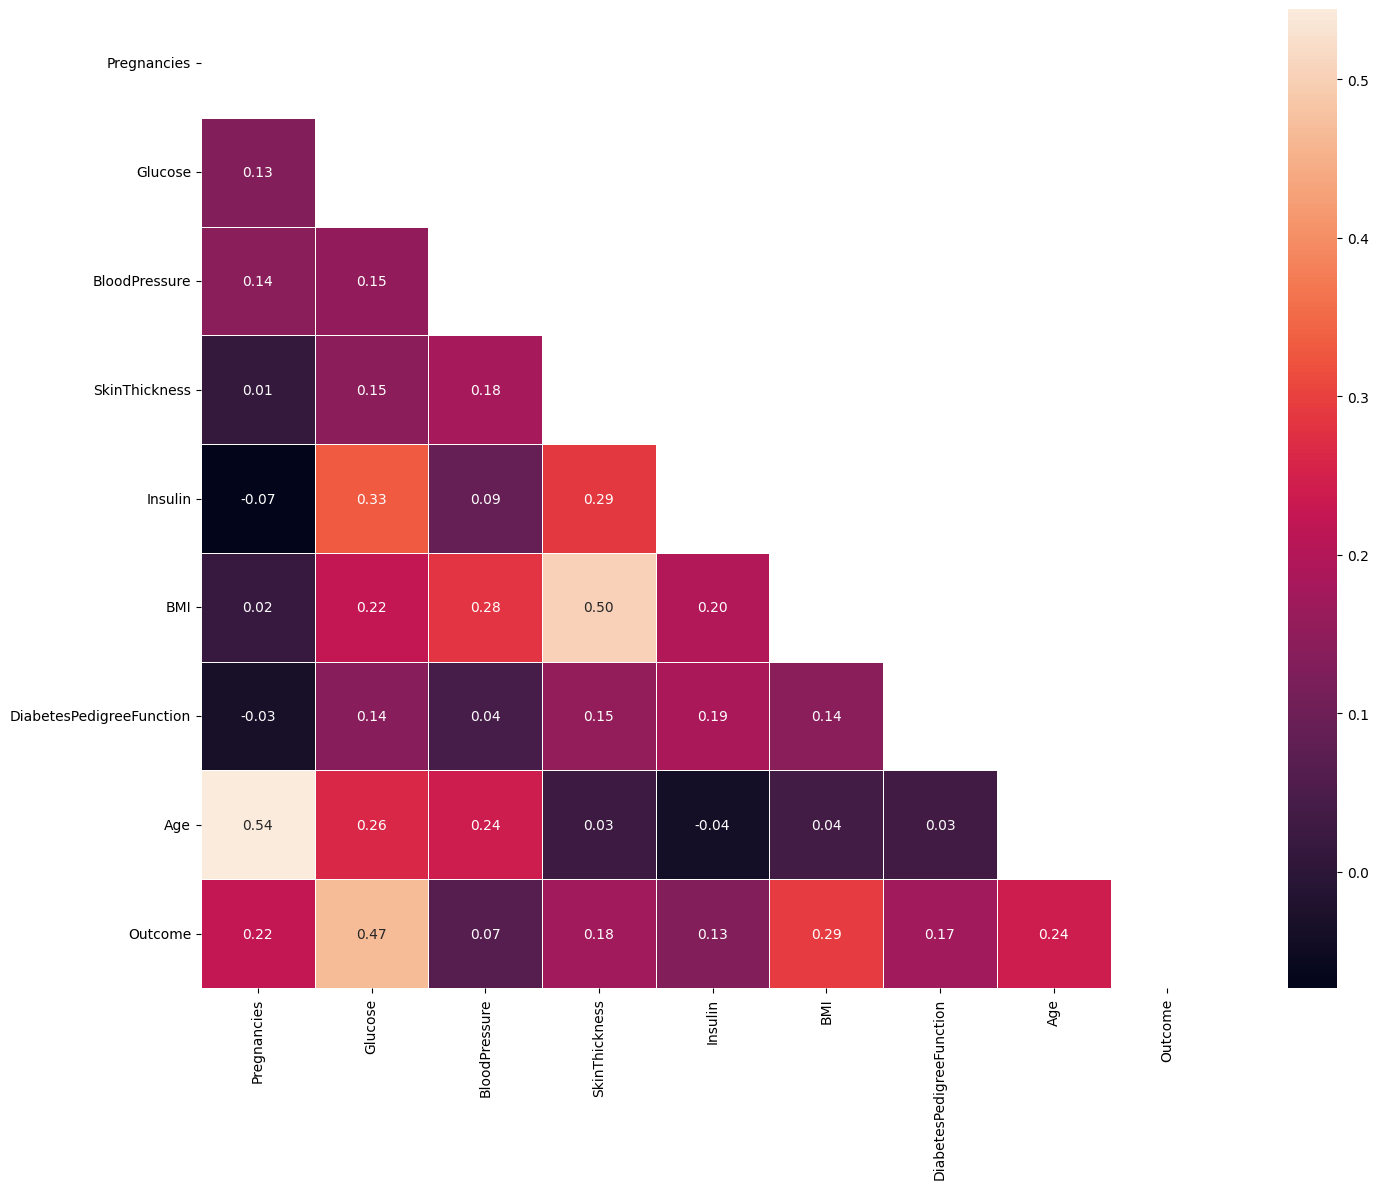

In [50]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.01]
significant_corr
fig, axis = plt.subplots(figsize=(15, 12))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

### Analisis de correlacion. 

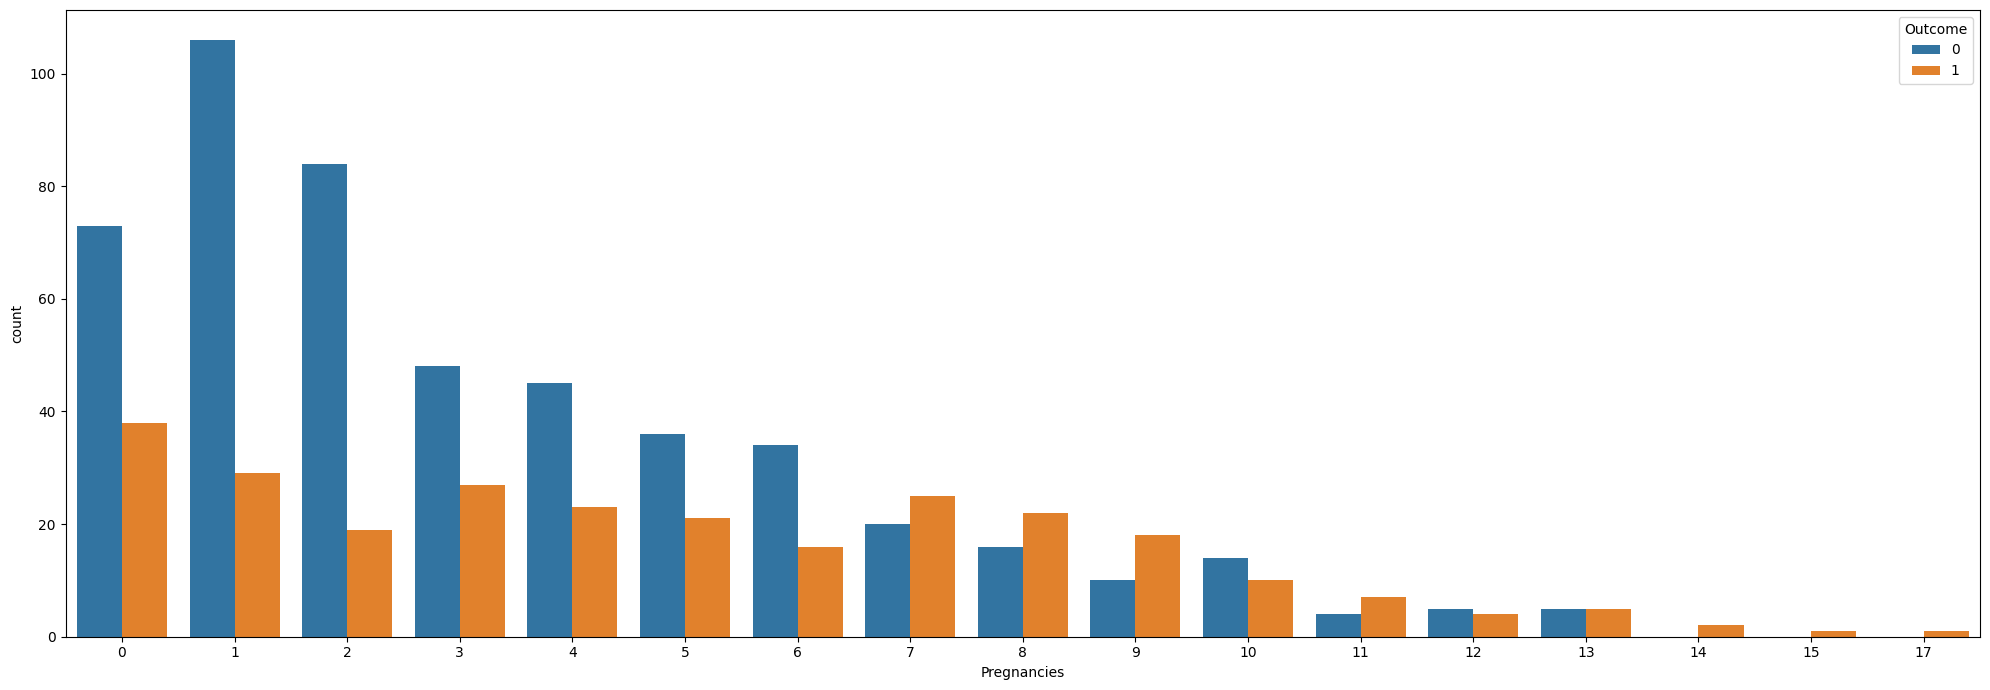

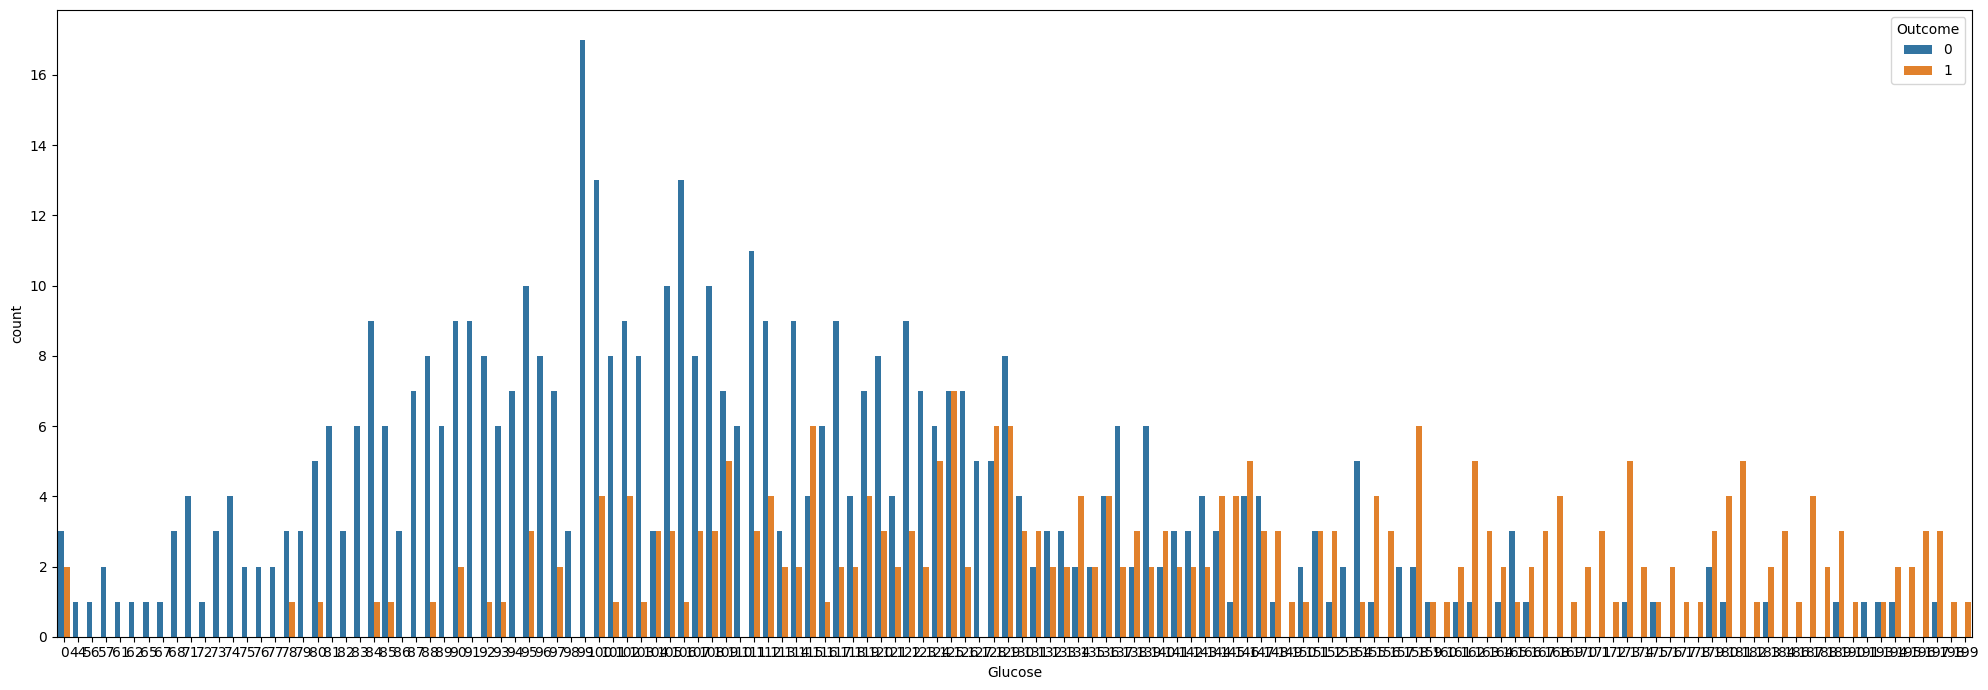

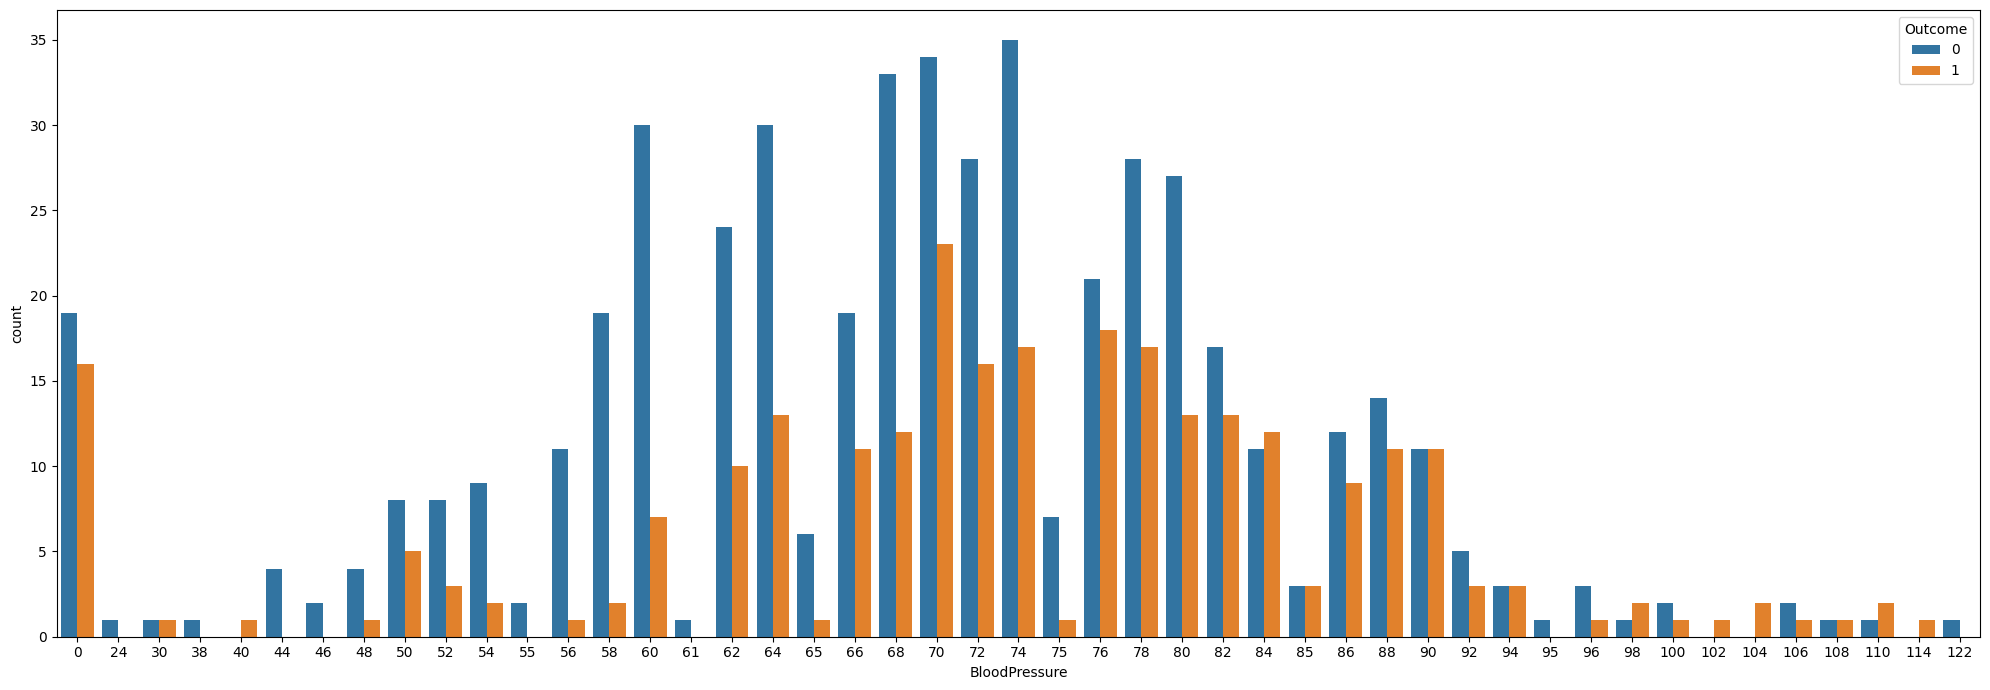

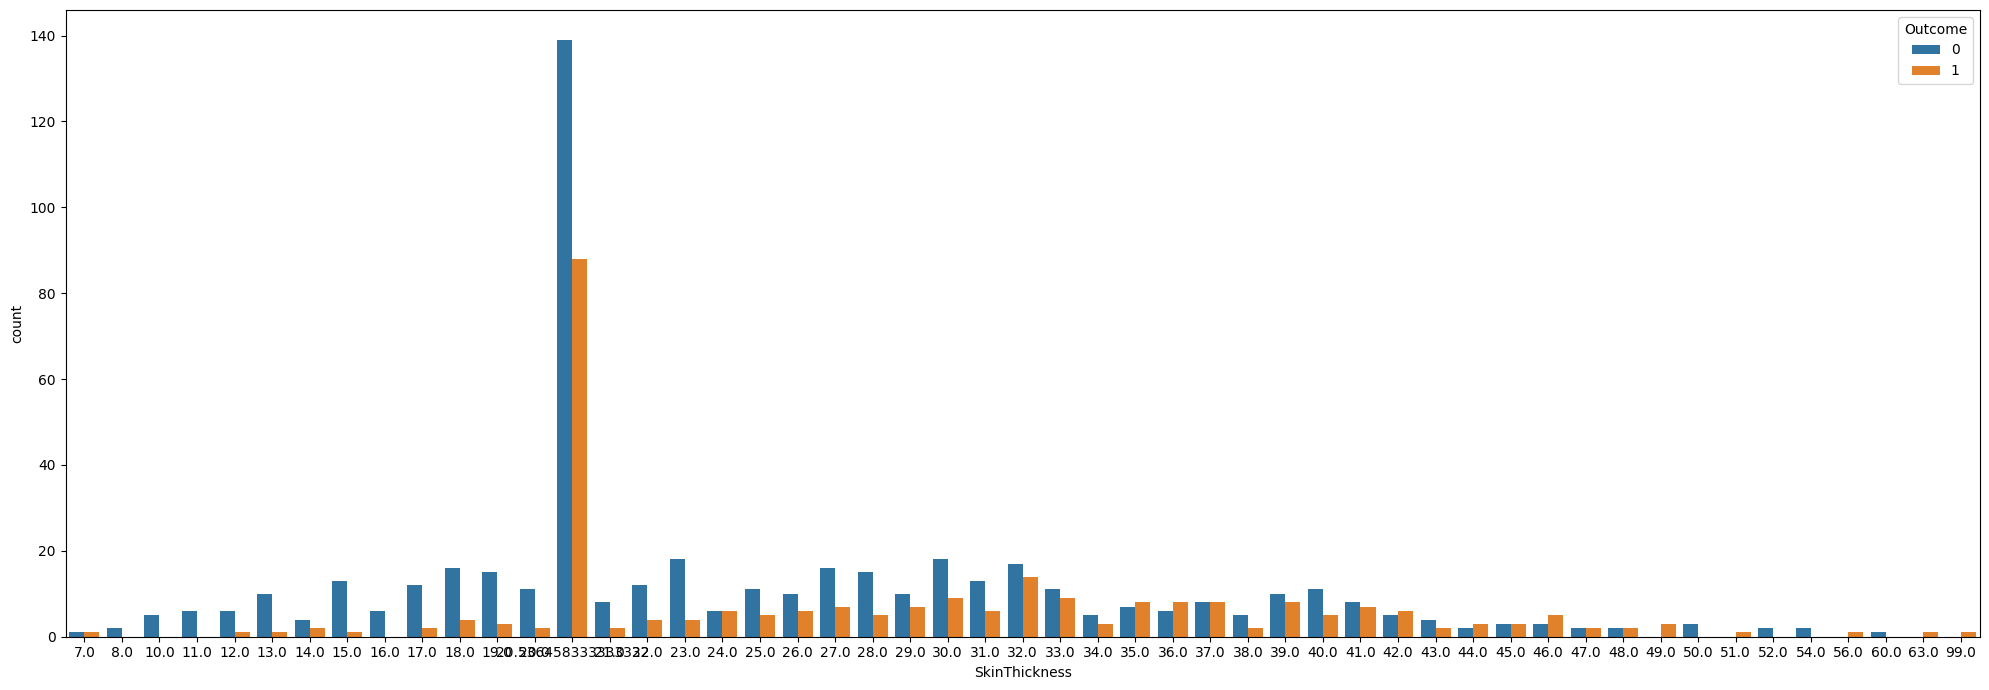

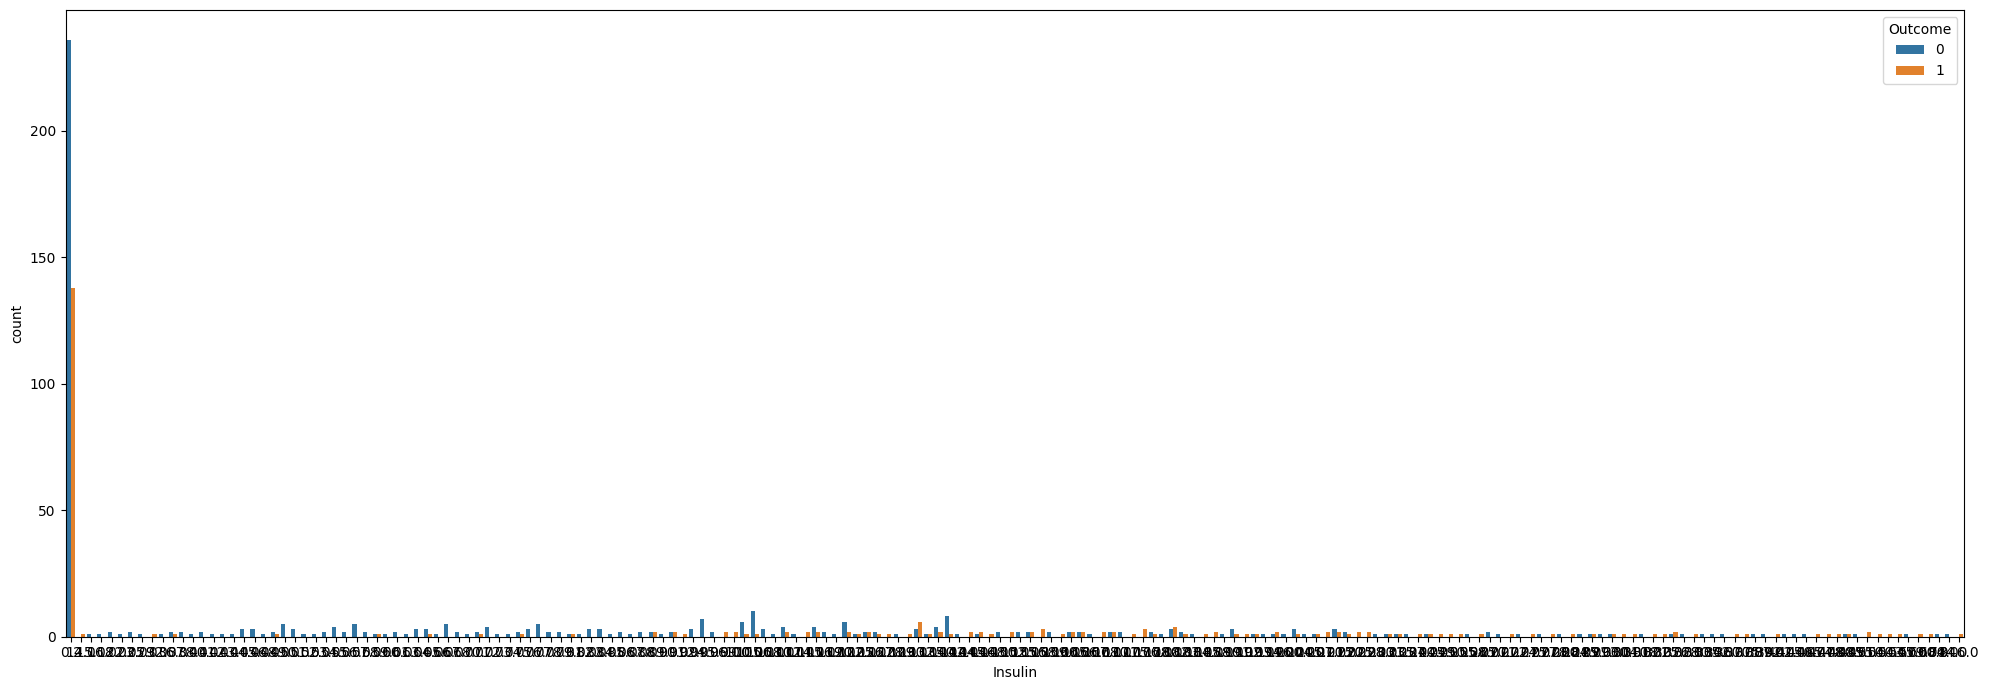

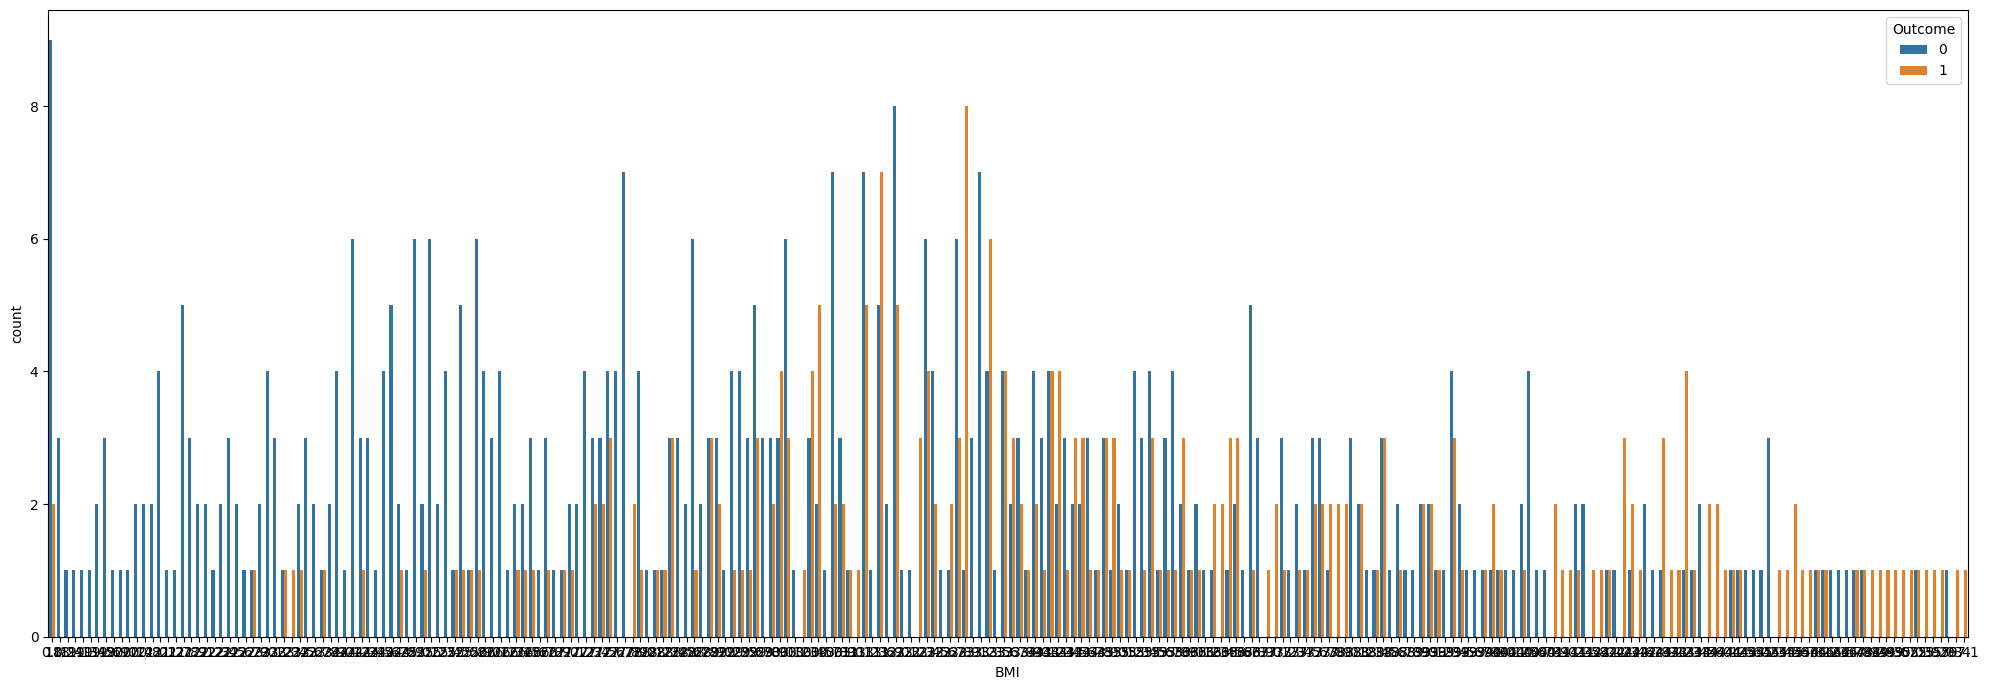

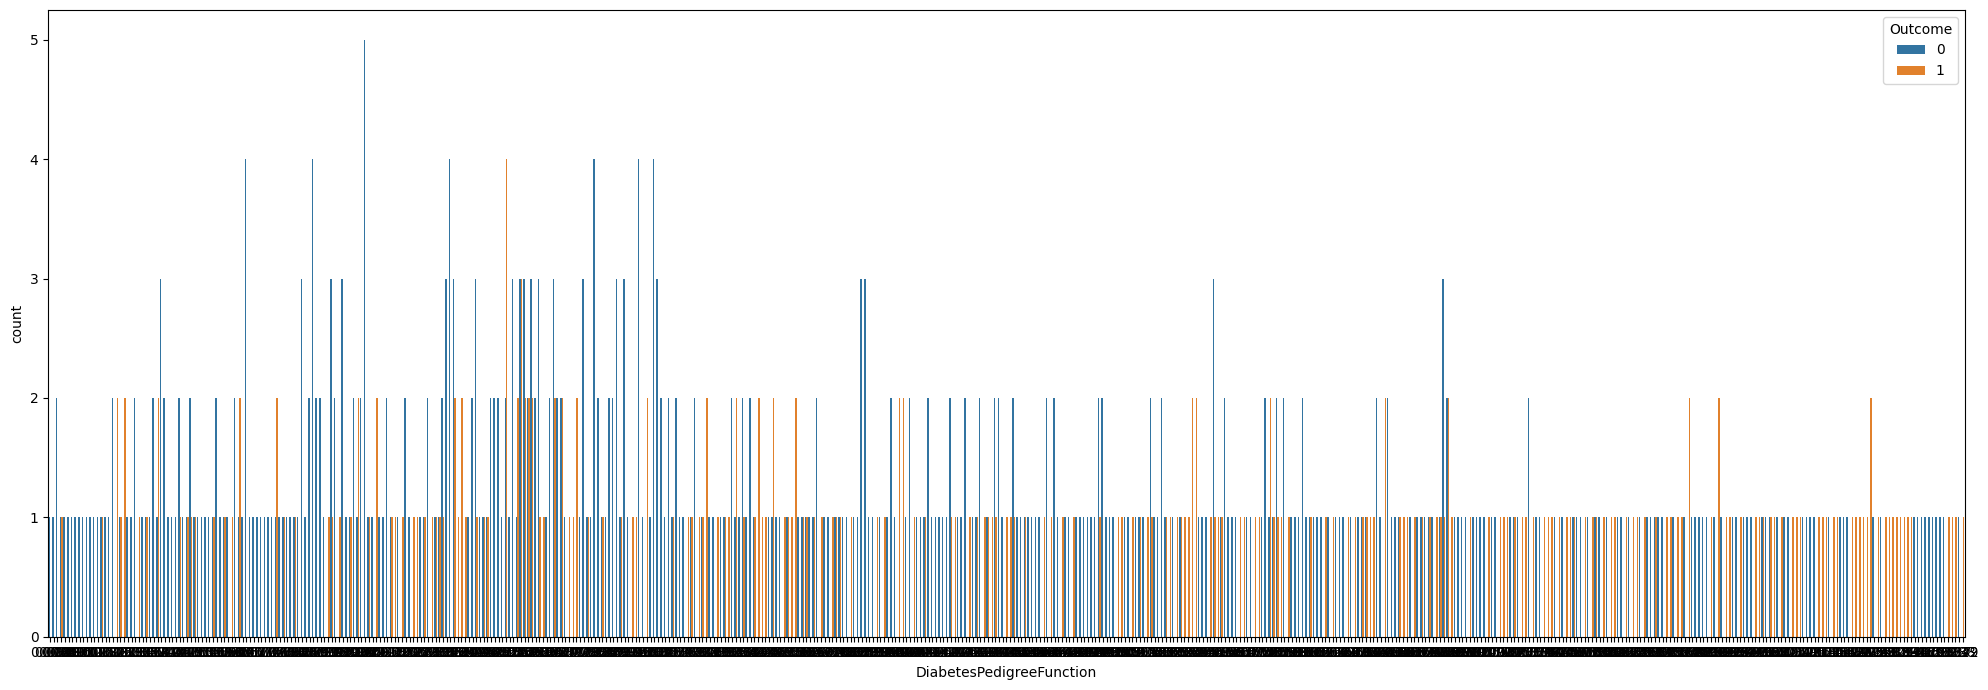

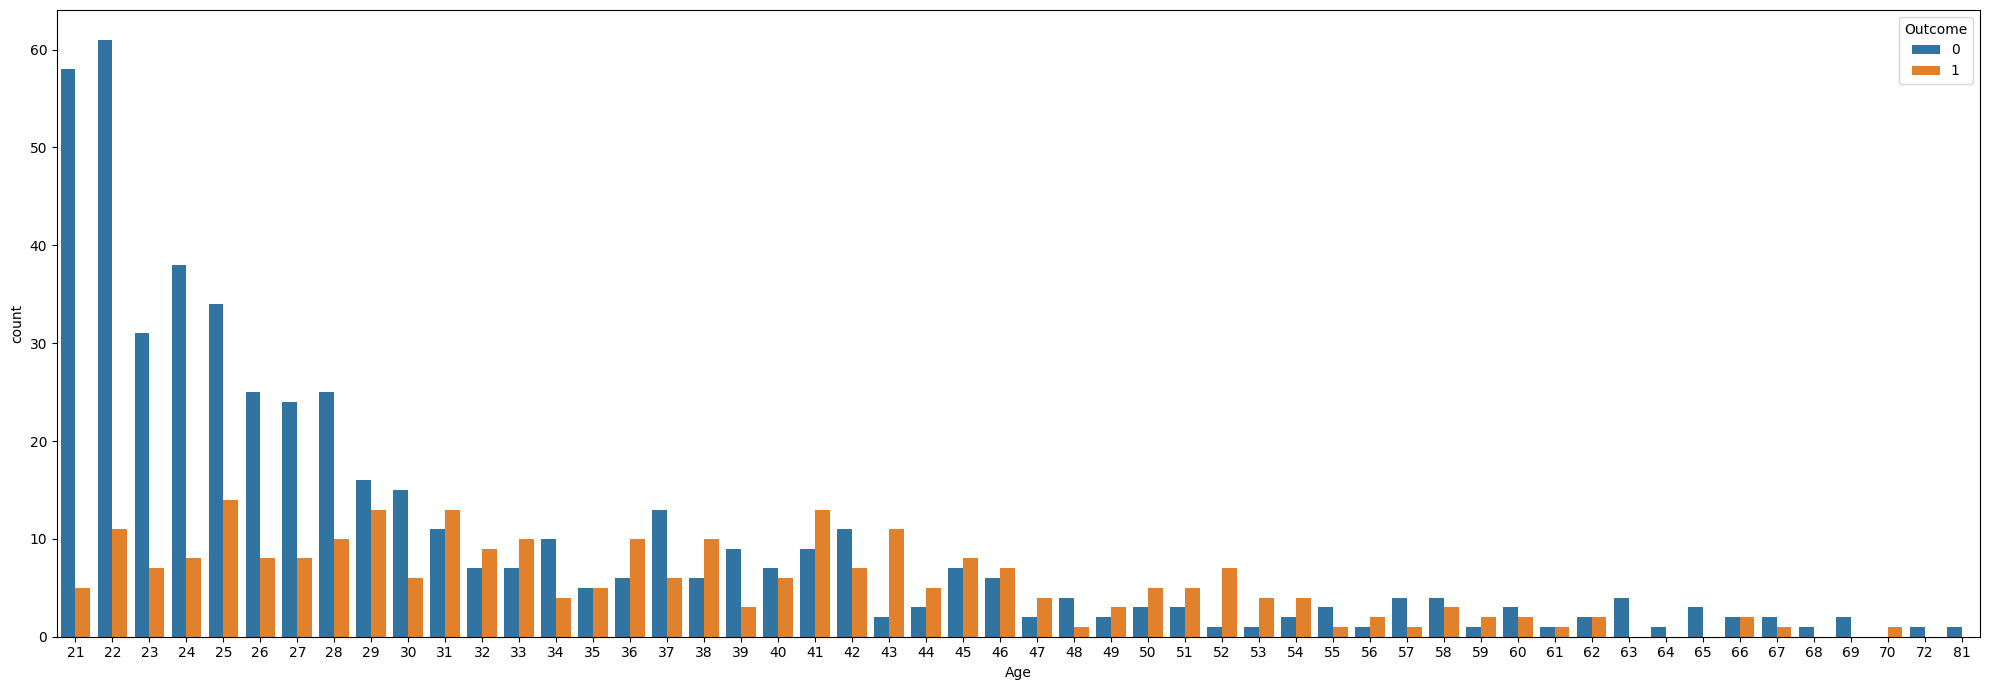

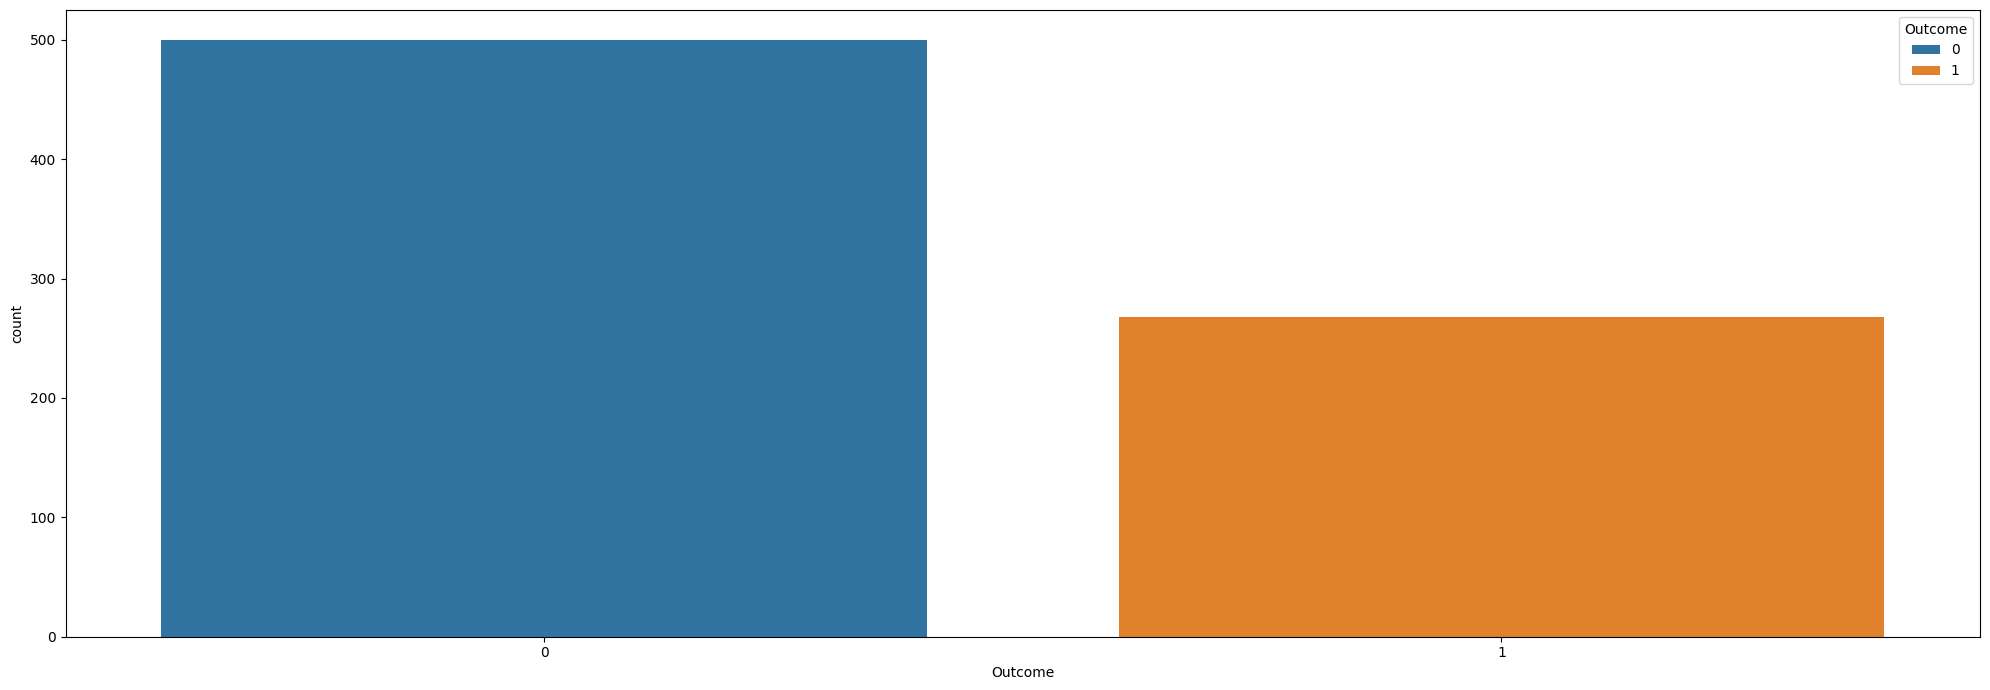

In [51]:
for columnas in df:
    fig, axis = plt.subplots(figsize=(20, 7))
    sns.countplot(data=df, x=columnas, hue='Outcome')
    plt.tight_layout()
    plt.show()

In [52]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [53]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
29,5,117,92,20.536458,0.2,34.1,0.337,38
286,5,155,84,44.000000,545.0,38.7,0.619,34
35,4,103,60,33.000000,192.0,24.0,0.966,33
392,1,131,64,14.000000,415.0,23.7,0.389,21
12,10,139,80,20.536458,0.2,27.1,1.441,57


In [54]:
eda_diabetes = pd.DataFrame(df)

eda_diabetes.to_csv('../data/processed/eda_insulina.csv', index=False)